In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('C:\Users\Nandhu Reddy\Dropbox\PC\Downloads\Mall_Customers 1.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Here we extract features by which we are going to cluster them
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
# we choose the number of clusters we want to form. We go for 5 clusters to get optimal solution
num_clusters = 5

# Display the chosen number of clusters
num_clusters


5

In [22]:
# This is where we initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Display the KMeans model
kmeans


KMeans(n_clusters=5, random_state=42)

In [23]:
# Fit the model to the data and get cluster labels
df['Cluster'] = kmeans.fit_predict(features)

# Display the updated DataFrame with cluster labels
df.head()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


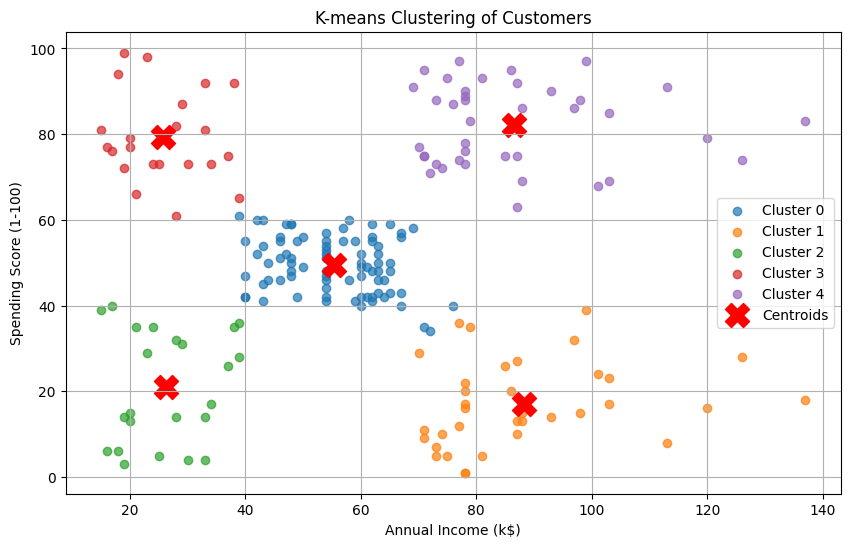

In [24]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster_id in range(num_clusters):
    cluster_data = features[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_id}', alpha=0.7)

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

# Customize the plot
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
